# Python Implementation of Experiments for Thesis

### Import Libraries

In [1]:
#-------------------------Setting the randomness-------#
import numpy as np
np.random.seed(1)

from tensorflow import set_random_seed
set_random_seed(1)
#------------------------------------------------------#


import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.core import Dense, Dropout, Flatten, Activation,Reshape





/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
num1=np.random.rand(2)
print(num1)

[0.417022   0.72032449]


In [4]:
np.random.seed(1)
num2=np.random.rand(2)
print(num2)

[0.417022   0.72032449]


## Load in training and testing dataset

In [2]:
from numpy import load
train_data = load('data/training_data.npy')
test_data = load('data/testing_data.npy')

In [3]:
print(train_data[0:5,0:1])
# print(train_data[3875])
print(len(train_data[3875:]))


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
1341


In [4]:
print(test_data[389])
print(test_data[390])

[1.         0.03137255 0.04705882 ... 0.         0.         0.        ]
[0.         0.12156863 0.12156863 ... 0.1254902  0.12941177 0.13333334]


 ## Method to choose balancing of training data

In [5]:
def balanced(option):
    if(option=="yes"):
        training_data = np.concatenate((train_data[0:1341],train_data[3875:]),axis=0)
        testing_data = np.concatenate((test_data[0:234],test_data[390:]))
        #training_data = train_data
        return training_data,testing_data
    else:
        training_data = train_data
        testing_data = np.concatenate((test_data[0:234],test_data[390:]))
        return training_data,testing_data


In [6]:
training_data,test_data=balanced("no")
print(training_data.shape)
print(test_data.shape)

(5216, 62501)
(468, 62501)


## We need to shuffle the data to allow the Model to learn in a varied manner


In [7]:
## Shuffling the data to make it more varied with yes or no to shuffling
def ShuffelData(data,option):
    if(option=="yes"):
        data = shuffle(data,random_state=0)
        return data
    else:
        return data
training_data = ShuffelData(training_data,"no")

In [8]:
X_train = training_data[0:,1:]
Y_train = training_data[0:,0:1]
X_test = test_data[0:,1:]
Y_test = test_data[0:,0:1]

In [9]:
y_train_ohe = keras.utils.to_categorical(Y_train, 2)
y_test_ohe = keras.utils.to_categorical(Y_test, 2)

In [10]:
X_train.shape[0]

5216

In [11]:
X_train = X_train.reshape(X_train.shape[0],250,250,1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0],250,250,1)
print(X_test.shape)

(5216, 250, 250, 1)
(468, 250, 250, 1)


## Create 2D CNN 

## 1. Define Sequential Model
## 2. Add 2D CNN with 32 filters,3x3 filters
## 3. Apply Relu
## 4. Apply Batch Norm
## Repeat x2
## 5. Apply MaxPooling(2,2)
## 6. Send through Fully Connected Layer


In [12]:
def create_model():
    model_CNN = Sequential()
    
    model_CNN.add(Conv2D(32,(3,3),input_shape=(250,250,1)))
    model_CNN.add(Activation('relu')) # Remember, Batch Norm is meant to go before activation. However, for purposes of recreating experriment 1 keep Batch Norm after activation
    
    model_CNN.add(Conv2D(32, (3, 3)))
    model_CNN.add(Activation('relu'))

    model_CNN.add(MaxPooling2D(pool_size=(2,2)))
    
    model_CNN.add(Flatten())# Flattens the output from the previos layer

    # Fully connected layer
    model_CNN.add(Dense(128))
    model_CNN.add(Activation('relu'))
    #model_CNN.add(Dropout(0.2))
    model_CNN.add(Dense(2))
    model_CNN.add(Activation('softmax'))
    
    return model_CNN

In [13]:
# print(create_model().summary())

# Setup for the experiment below

## 1. Model is ran with the above architeture 
## 2.Trained on Imbalanced Set
## 3. Tested on Balanced Set

# This is a test to see if running 10 experiments for the same setup of model produces the same results 

In [14]:
# accuracy = []
# for i in range(0,10):
#     model = create_model() 
#     opt = optimizers.Adam(lr=0.01)
#     model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
#     model.fit(X_train, y_train_ohe,batch_size=64,epochs=25,validation_data=(X_test, y_test_ohe))# model
#     score = model.evaluate(X_test, y_test_ohe)
#     accuracy.append(round(score[1]*100))


In [15]:
model = create_model()
opt = optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train_ohe,batch_size=64,epochs=1,validation_data=(X_test, y_test_ohe))# model

W0410 22:09:50.976075 140662387439424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:550: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 5216 samples, validate on 468 samples
Epoch 1/1
5216/5216 [==============================] - 11s 2ms/step - loss: 13.1794 - accuracy: 0.7308 - val_loss: 0.8186 - val_accuracy: 0.5000


In [20]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


# Plotting accuracy
## Remember to UNCOMMENT the .savefig 

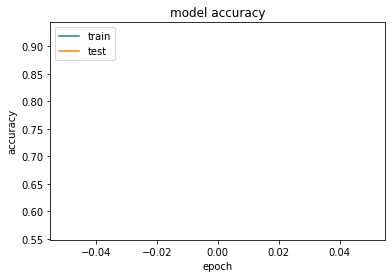

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#plt.savefig('train_vs_test_accuracy_shuffled.png')
plt.show()


In [ ]:
## What does the above graph tell us about the model 
## -> What we see is that when it comes to training the model, it has high accuracy on the training set.
# However when looking at the testing accuracy we can see the accuracy after every epoch is quite volatile. 
# What this tell us is that the model has clearly not been able to learn from training data. When looking at the graph it also shows overfitting 
## But this comes secondary to the concept of the model actually underfitting even though the the accuracy on the training data is high. 

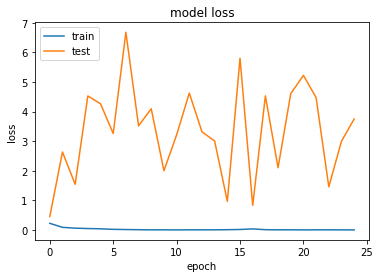

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('train_vs_test_loss_shuffled.png')
plt.show()

In [16]:
score = model.evaluate(X_test, y_test_ohe)
print('Loss ' , score[0])
print('Test accuracy: ', score[1]*100)

468/468 [==============================] - 0s 654us/step
Loss  0.8186303234507895
Test accuracy:  50.0


In [17]:
y_pred = model.predict_classes(X_test)


## Lets Visualise the output of Confusion Matrix

In [18]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.metrics import confusion_matrix

matrix = ["TN","FP"],["FN","TP"]
print(matrix[0])
print(matrix[1])

##Lets Visualise the output
conf=confusion_matrix(Y_test, y_pred)
print("Confusion Matrix")
print(conf)
# or we can use a heatmap from the seaborn library
#import seaborn as sn
#df_cm = pandas.DataFrame(conf, range(2), range(2))
#sn.set(font_scale=1.4)#for label size
#sn.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 20},fmt="d")# font size

from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

['TN', 'FP']
['FN', 'TP']
Confusion Matrix
[[  0 234]
 [  0 234]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       234
         1.0       0.50      1.00      0.67       234

    accuracy                           0.50       468
   macro avg       0.25      0.50      0.33       468
weighted avg       0.25      0.50      0.33       468



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
